# EE4375-2022: Extension to Sixth Lab Session to second order elements: 4-element/13-node mesh 

Second order triangular elements on unit square. 

## Import Packages

In [1]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using SparseArrays 
using Plots
using LaTeXStrings

In [2]:
include("quadrature.jl")

compute_weights_triangle

## Section 1: Geometry and Mesh Generation of Unit Square Geometry
Here we ask GMSH to generate a second order mesh. 

In [3]:
#..1/4: initialize gmsh 
gmsh.initialize()

#..2/4: generate geometry 
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("square")
#..set mesh density parameter 
lc = 0.1
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([1], 1)
#..give label to the surface 
#..syntax of the function being used is gmsh.model.setPhysicalName(dim, tag, name) 
gmsh.model.setPhysicalName(2, 1, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()

#..3/4: generate two-dimensional mesh 
gmsh.option.setNumber("Mesh.ElementOrder", 2)
gmsh.option.setNumber("Mesh.SecondOrderLinear", 1)
gmsh.model.mesh.generate(2)
#..if true, write mesh to file for further processing 
if (true) gmsh.write("square-2nd.msh") end 
#..if true, visualize mesh through the GUI 
if (false) gmsh.fltk.run() end 

#..4/4: finalize gmsh 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000171125s, CPU 0.00016s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00206625s, CPU 0.002032s)
Info    : Meshing order 2 (curvilinear off)...
Info    : [  0%] Meshing curve 1 order 2
Info    : [ 20%] Meshing curve 2 order 2
Info    : [ 40%] Meshing curve 3 order 2
Info    : [ 60%] Meshing curve 4 order 2
Info    : [ 80%] Meshing surface 1 order 2
Info    : Surface mesh: worst distortion = 1 (0 elements in ]0, 0.2]); worst gamma = 0.863919
Info    : Done meshing order 2 (Wall 0.000437s, CPU 0.000422s)
Info    : 525 nodes 286 elements
Info    : Writing 'square-2nd.msh'...
Info    : Done writing 'square-2nd.msh'


## Section 2:/ Read Mesh from file and perform loop over the elements
In this section we retrieve information for the GMSH data structure and find out where GMSH stores a lot of its goodies. 

### Section 1.2/ Loop over 2D (triangular, surface) elements 
Note how each 2D element is connected to six (6) nodes and how in total 13 nodes appear. 

In [4]:
#..1/5: Finalize gmsh
gmsh.initialize()

#..2/5: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/5: retrieve number of triangular elements on the 2D surface and their connectivity 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..4/5: perform loop over the 2D elemements 
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][6*(element_id-1)+1]
    node2_id = element_connectivity[1][6*(element_id-1)+2]
    node3_id = element_connectivity[1][6*(element_id-1)+3]
    node4_id = element_connectivity[1][6*(element_id-1)+4]
    node5_id = element_connectivity[1][6*(element_id-1)+5]
    node6_id = element_connectivity[1][6*(element_id-1)+6]    

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " node-4 has global number ", node4_id)
    println("on element ", element_id, " node-5 has global number ", node5_id)
    println("on element ", element_id, " node-6 has global number ", node6_id)
    println(" ")

end 

#..5/5: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 525 nodes
Info    : 286 elements
Info    : Done reading 'square-2nd.msh'
on element 1 node-1 has global number 112
on element 1 node-2 has global number 121
on element 1 node-3 has global number 142
on element 1 node-4 has global number 183
on element 1 node-5 has global number 184
on element 1 node-6 has global number 185
 
on element 2 node-1 has global number 162
on element 2 node-2 has global number 116
on element 2 node-3 has global number 164
on element 2 node-4 has global number 186
on element 2 node-5 has global number 187
on element 2 node-6 has global number 188
 
on element 3 node-1 has global number 155
on element 3 node-2 has global number 89
on element 3 node-3 has global number 160
on element 3 node-4 has global number 189
on element 3 node-5 has global number 190
on element 3 node-6 has global number 191
 
on element 4 node-1 has global number 146
on element 4 node-2 has global number 92
on element 4 n

on element 40 node-1 has global number 114
on element 40 node-2 has global number 135
on element 40 node-3 has global number 164
on element 40 node-4 has global number 259
on element 40 node-5 has global number 271
on element 40 node-6 has global number 272
 
on element 41 node-1 has global number 150
on element 41 node-2 has global number 168
on element 41 node-3 has global number 173
on element 41 node-4 has global number 273
on element 41 node-5 has global number 248
on element 41 node-6 has global number 274
 
on element 42 node-1 has global number 116
on element 42 node-2 has global number 162
on element 42 node-3 has global number 177
on element 42 node-4 has global number 186
on element 42 node-5 has global number 275
on element 42 node-6 has global number 276
 
on element 43 node-1 has global number 134
on element 43 node-2 has global number 133
on element 43 node-3 has global number 135
on element 43 node-4 has global number 267
on element 43 node-5 has global number 208
on el

on element 79 node-6 has global number 335
 
on element 80 node-1 has global number 30
on element 80 node-2 has global number 31
on element 80 node-3 has global number 89
on element 80 node-4 has global number 40
on element 80 node-5 has global number 336
on element 80 node-6 has global number 322
 
on element 81 node-1 has global number 68
on element 81 node-2 has global number 69
on element 81 node-3 has global number 92
on element 81 node-4 has global number 78
on element 81 node-5 has global number 337
on element 81 node-6 has global number 338
 
on element 82 node-1 has global number 141
on element 82 node-2 has global number 84
on element 82 node-3 has global number 142
on element 82 node-4 has global number 311
on element 82 node-5 has global number 339
on element 82 node-6 has global number 340
 
on element 83 node-1 has global number 149
on element 83 node-2 has global number 85
on element 83 node-3 has global number 153
on element 83 node-4 has global number 341
on element 83

on element 119 node-1 has global number 118
on element 119 node-2 has global number 115
on element 119 node-3 has global number 150
on element 119 node-4 has global number 389
on element 119 node-5 has global number 402
on element 119 node-6 has global number 403
 
on element 120 node-1 has global number 138
on element 120 node-2 has global number 101
on element 120 node-3 has global number 152
on element 120 node-4 has global number 397
on element 120 node-5 has global number 404
on element 120 node-6 has global number 405
 
on element 121 node-1 has global number 112
on element 121 node-2 has global number 113
on element 121 node-3 has global number 121
on element 121 node-4 has global number 406
on element 121 node-5 has global number 407
on element 121 node-6 has global number 183
 
on element 122 node-1 has global number 109
on element 122 node-2 has global number 110
on element 122 node-3 has global number 115
on element 122 node-4 has global number 408
on element 122 node-5 has 

on element 178 node-5 has global number 229
on element 178 node-6 has global number 213
 
on element 179 node-1 has global number 90
on element 179 node-2 has global number 50
on element 179 node-3 has global number 159
on element 179 node-4 has global number 332
on element 179 node-5 has global number 460
on element 179 node-6 has global number 458
 
on element 180 node-1 has global number 89
on element 180 node-2 has global number 31
on element 180 node-3 has global number 160
on element 180 node-4 has global number 336
on element 180 node-5 has global number 462
on element 180 node-6 has global number 190
 
on element 181 node-1 has global number 92
on element 181 node-2 has global number 69
on element 181 node-3 has global number 161
on element 181 node-4 has global number 337
on element 181 node-5 has global number 464
on element 181 node-6 has global number 193
 
on element 182 node-1 has global number 91
on element 182 node-2 has global number 12
on element 182 node-3 has global

on element 217 node-4 has global number 507
on element 217 node-5 has global number 503
on element 217 node-6 has global number 510
 
on element 218 node-1 has global number 143
on element 218 node-2 has global number 83
on element 218 node-3 has global number 172
on element 218 node-4 has global number 316
on element 218 node-5 has global number 510
on element 218 node-6 has global number 511
 
on element 219 node-1 has global number 118
on element 219 node-2 has global number 150
on element 219 node-3 has global number 173
on element 219 node-4 has global number 403
on element 219 node-5 has global number 274
on element 219 node-6 has global number 512
 
on element 220 node-1 has global number 172
on element 220 node-2 has global number 118
on element 220 node-3 has global number 173
on element 220 node-4 has global number 504
on element 220 node-5 has global number 512
on element 220 node-6 has global number 513
 
on element 221 node-1 has global number 143
on element 221 node-2 has

### Section 2.2/ Loop over 1D (line, boundary) elements and construct array of boundary indices (to be editted as a function taking the mesh as an input)

In [5]:
#..1/6: Finalize gmsh
gmsh.initialize()

#..2/6: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/6: perform loop over the 1D elemements and construct I_bnd  
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(1)
nelements = length(element_ids[1])

#..4/6: initialize vector of boundaryv indices (to be editted to avoid allocations withoi)
bnd_node_ids = Vector{Int64}([])

#..5/6: retrieve number of triangular elements on the 2D surface and their connectivity
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println(" ")

    union!(bnd_node_ids,node1_id, node2_id, node3_id)
    
end 

#..6/6: Finalize gmsh
gmsh.finalize()

display(bnd_node_ids)

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 525 nodes
Info    : 286 elements
Info    : Done reading 'square-2nd.msh'
on element 1 node-1 has global number 1
on element 1 node-2 has global number 5
on element 1 node-3 has global number 14
 
on element 2 node-1 has global number 5
on element 2 node-2 has global number 6
on element 2 node-3 has global number 15
 
on element 3 node-1 has global number 6
on element 3 node-2 has global number 7
on element 3 node-3 has global number 16
 
on element 4 node-1 has global number 7
on element 4 node-2 has global number 8
on element 4 node-3 has global number 17
 
on element 5 node-1 has global number 8
on element 5 node-2 has global number 9
on element 5 node-3 has global number 18
 
on element 6 node-1 has global number 9
on element 6 node-2 has global number 10
on element 6 node-3 has global number 19
 
on element 7 node-1 has global number 10
on element 7 node-2 has global number 11
on element 7 node-3 has global number

80-element Vector{Int64}:
  1
  5
 14
  6
 15
  7
 16
  8
 17
  9
 18
 10
 19
  ⋮
 74
 66
 75
 67
 76
 68
 77
 69
 78
 70
 79
 80

### Section 3.2/ Lookup of the number of nodes
Retrieve the number of nodes from the mesh. Note that we include the nodes on the boundary. 

In [6]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/4: look-up of the number of nodes 
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
println(" getNodes() results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(2)
nnodes = length(node_ids)
println(" getNodes(2) results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(2,-1, true)
nnodes = length(node_ids)
println(" getNodes(2,-1, true) results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(1)
nnodes = length(node_ids)
println(" getNodes(1) results in ", nnodes, " nodes \n")

#..4/4: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 525 nodes
Info    : 286 elements
Info    : Done reading 'square-2nd.msh'
 getNodes() results in 525 nodes 

 getNodes(2) results in 445 nodes 

 getNodes(2,-1, true) results in 525 nodes 

 getNodes(1) results in 76 nodes 



### Section 4.2/ Additional Information on GMSH 
Here we provide pointers to retrieve even more information. 

In [7]:
?gmsh.model.mesh.getElements

```
gmsh.model.mesh.getElements(dim = -1, tag = -1)
```

Get the elements classified on the entity of dimension `dim` and tag `tag`. If `tag` < 0, get the elements for all entities of dimension `dim`. If `dim` and `tag` are negative, get all the elements in the mesh. `elementTypes` contains the MSH types of the elements (e.g. `2` for 3-node triangles: see `getElementProperties` to obtain the properties for a given element type). `elementTags` is a vector of the same length as `elementTypes`; each entry is a vector containing the tags (unique, strictly positive identifiers) of the elements of the corresponding type. `nodeTags` is also a vector of the same length as `elementTypes`; each entry is a vector of length equal to the number of elements of the given type times the number N of nodes for this type of element, that contains the node tags of all the elements of the given type, concatenated: [e1n1, e1n2, ..., e1nN, e2n1, ...].

Return `elementTypes`, `elementTags`, `nodeTags`.


In [8]:
?gmsh.model.mesh.getElementProperties(9)

```
gmsh.model.mesh.getElementProperties(elementType)
```

Get the properties of an element of type `elementType`: its name (`elementName`), dimension (`dim`), order (`order`), number of nodes (`numNodes`), local coordinates of the nodes in the reference element (`localNodeCoord` vector, of length `dim` times `numNodes`) and number of primary (first order) nodes (`numPrimaryNodes`).

Return `elementName`, `dim`, `order`, `numNodes`, `localNodeCoord`, `numPrimaryNodes`.


In [9]:
?gmsh.model.mesh.getNodes

```
gmsh.model.mesh.getNodes(dim = -1, tag = -1, includeBoundary = false, returnParametricCoord = true)
```

Get the nodes classified on the entity of dimension `dim` and tag `tag`. If `tag` < 0, get the nodes for all entities of dimension `dim`. If `dim` and `tag` are negative, get all the nodes in the mesh. `nodeTags` contains the node tags (their unique, strictly positive identification numbers). `coord` is a vector of length 3 times the length of `nodeTags` that contains the x, y, z coordinates of the nodes, concatenated: [n1x, n1y, n1z, n2x, ...]. If `dim` >= 0 and `returnParamtricCoord` is set, `parametricCoord` contains the parametric coordinates ([u1, u2, ...] or [u1, v1, u2, ...]) of the nodes, if available. The length of `parametricCoord` can be 0 or `dim` times the length of `nodeTags`. If `includeBoundary` is set, also return the nodes classified on the boundary of the entity (which will be reparametrized on the entity if `dim` >= 0 in order to compute their parametric coordinates).

Return `nodeTags`, `coord`, `parametricCoord`.


## Section 3:/ Extract Data from the Mesh and Perform a FEM Computation 

In [10]:
function area_triangle(x1,x2,x3,y1,y2,y3)
    x12 = x2 - x1; x13 = x3-x1;
    y12 = y2 - y1; y13 = y3-y1;
    area_id = x12*y13 - x13*y12; 
    area_id = abs(area_id)/2
    return area_id 
end

area_triangle (generic function with 1 method)

In [11]:
# polynomial degree to FE approximation  
pdegree = 1;
# degree of numerical quadrature 
qorder = 6; 
xi = compute_coordinates_triangle(qorder)
w  = compute_weights_triangle(qorder)
display(xi)
display(w)

16-element Vector{Vector{Float64}}:
 [0.06943184420297371, 0.06461106321354769]
 [0.06943184420297371, 0.30709631153115907]
 [0.06943184420297371, 0.6234718442658671]
 [0.06943184420297371, 0.8659570925834785]
 [0.33000947820757187, 0.046518677526560935]
 [0.33000947820757187, 0.22110322250073802]
 [0.33000947820757187, 0.44888729929169013]
 [0.33000947820757187, 0.6234718442658671]
 [0.6699905217924281, 0.02291316667641278]
 [0.6699905217924281, 0.10890625570683385]
 [0.6699905217924281, 0.22110322250073802]
 [0.6699905217924281, 0.30709631153115907]
 [0.9305681557970262, 0.004820780989426014]
 [0.9305681557970262, 0.02291316667641278]
 [0.9305681557970262, 0.046518677526560935]
 [0.9305681557970262, 0.06461106321354769]

16-element Vector{Float64}:
 0.02815038307692565
 0.0527752773542295
 0.0527752773542295
 0.02815038307692565
 0.03799714764795021
 0.0712356204997401
 0.0712356204997401
 0.03799714764795021
 0.018715815315012756
 0.0350877052529335
 0.0350877052529335
 0.018715815315012756
 0.0021003652444748482
 0.003937685608733464
 0.003937685608733464
 0.0021003652444748482

In [12]:
g(x) = x[1]^2+x[2]^3

g (generic function with 1 method)

In [13]:
length(xi)

16

In [14]:
g.(xi)

16-element Vector{Float64}:
 0.005090505654828206
 0.03378246432993409
 0.24717497353225018
 0.6541861457489913
 0.10900692153695035
 0.11971524824259784
 0.19935696008776715
 0.351260448249658
 0.4488993290068127
 0.4501789898366985
 0.45969629182745414
 0.4778489826321982
 0.8659572046180881
 0.8659691222986011
 0.866057758413595
 0.8662268172488807

In [15]:
fvaluesloc = [g(xi[i][1],xi[i][2]) for i=1:length(xi)] 
fvaluesloc = repeat(fvaluesloc,outer=(1,6))
display(fvaluesloc)

LoadError: MethodError: no method matching g(::Float64, ::Float64)
[0mClosest candidates are:
[0m  g(::Any) at In[12]:1

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 525 nodes
Info    : 286 elements
Info    : Done reading 'square-2nd.msh'


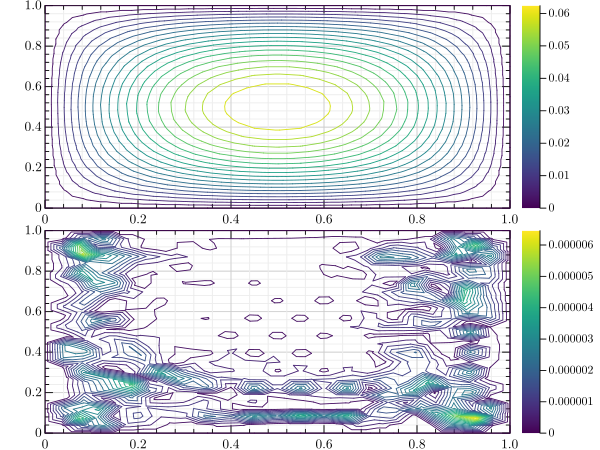

In [16]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square-2nd.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and analytical reference solution 
sourcefunction(x)  = 4*x[1]*(1-x[1])+4*x[2]*(1-x[2])
analreffunction(x) = x[1]*(1-x[1])*x[2]*(1-x[2])

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][6*(element_id-1)+1]
  node2_id = element_connectivity[1][6*(element_id-1)+2]
  node3_id = element_connectivity[1][6*(element_id-1)+3]
  node4_id = element_connectivity[1][6*(element_id-1)+4]
  node5_id = element_connectivity[1][6*(element_id-1)+5]
  node6_id = element_connectivity[1][6*(element_id-1)+6]    
  I = Vector{Int64}([node1_id; node2_id; node3_id; node4_id; node5_id; node6_id])
  # display(I)
    
  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  xnode4 = xnode[node4_id]; xnode5 = xnode[node5_id]; xnode6 = xnode[node6_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];
  ynode4 = ynode[node4_id]; ynode5 = ynode[node5_id]; ynode6 = ynode[node6_id];
  x1 = [xnode1, ynode1]; x2 = [xnode2, ynode2]; x3 = [xnode3, ynode3];  
  x4 = [xnode4, ynode4]; x5 = [xnode5, ynode5]; x6 = [xnode6, ynode6];  

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....computation of the coefficients of the basis functions 
  x = [x1, x2, x3, x4, x5, x6]
  X = [[x1[1]^2, x1[2]^2, x1[1]*x1[2], x1[1], x1[2], 1] for x1 in x]
  X = reduce(vcat,transpose(X))
  Emat = X\UniformScaling(1.)
   
  #....transform quadrature points to physical domain    
  T = zeros(2,2); T[:,1] = x2 - x1; T[:,2] = x3 - x1; 
  xs = [T*xi1+x1 for xi1 in xi];

  #....construct Vandermonde Matrix for evaluation of the basis functions
  Xs = zeros(length(w),6);   
  Xs = [[xs1[1]^2, xs1[2]^2, xs1[1]*xs1[2], xs1[1], xs1[2], 1] for xs1 in xs];
  Xs = reduce(vcat,transpose(Xs))
    
  #....construct Vandermonde Matrix for evaluation of the x/y derivatives of basis functions
  dxXs = zeros(length(w),6);
  dxXs = [[2*xs1[1], 0 , xs1[2], 1, 0, 0] for xs1 in xs];
  dxXs = reduce(vcat,transpose(dxXs))
  dyXs = zeros(length(w),6);
  dyXs = [[0, 2*xs1[2], xs1[1], 0, 1, 0] for xs1 in xs];
  dyXs = reduce(vcat,transpose(dyXs))
    
  #....coonstruct column matrices of basis functions and derivatives of the basis functions   
  Phi   = Xs*Emat; 
  dxPhi = dxXs*Emat; 
  dyPhi = dyXs*Emat; 

  #....compute contributions to the local mass and stiffness matrix   
  PhiPhi = zeros(length(w),36);
  [PhiPhi[:,(j-1)*6+i] = Phi[:,i].*Phi[:,j] for i=1:6,j=1:6];
  dxPhidxPhi = zeros(length(w),36);
  [dxPhidxPhi[:,(j-1)*6+i] = dxPhi[:,i].*dxPhi[:,j] for i=1:6,j=1:6];
  dyPhidyPhi = zeros(length(w),36);
  [dyPhidyPhi[:,(j-1)*6+i] = dyPhi[:,i].*dyPhi[:,j] for i=1:6,j=1:6];
  dPhidPhi = dxPhidxPhi + dyPhidyPhi; 
  Mloc = 2*area_id*Transpose(w)*PhiPhi
  Aloc = 2*area_id*Transpose(w)*dPhidPhi
  Aloc = reshape(Aloc,6,6)  
    
  #....compute local vector contribution floc 
  fvaluesloc = sourcefunction.(xs) 
  fvaluesloc = repeat(fvaluesloc,outer=(1,6))
  floc = area_id*Transpose(w)*(fvaluesloc.*Phi)  
  floc = Transpose(floc)
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc
  A[I,I] += Aloc
#  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..10/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

uref = analreffunction.([ [xnode[i],ynode[i]] for i=1:length(xnode)])

#..11/12 Plot the numerical solution
GR.trisurf(xnode,ynode,u)

GR.subplot(2,1,1)
p1 = GR.tricont(xnode,ynode,u)
GR.subplot(2,1,2)
p1 = GR.tricont(xnode,ynode,abs.(u-uref))

In [17]:
abs.(u-uref)

525×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.7884035367760065e-6
 1.1195234711630642e-6
 3.0289049653652034e-6
 2.359619917033026e-6
 5.201883442076255e-6
 3.012714054252512e-6
 5.851150871663546e-6
 1.2465199315907227e-6
 2.82656835352401e-6
 3.408037333382796e-7
 2.0900862630034156e-6
 1.396904308455238e-6

In [48]:
[ [xnode[i],ynode[i]] for i=1:length(xnode)]

46929-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [1.0, 0.0]
 [1.0, 1.0]
 [0.0, 1.0]
 [0.009999999999981104, 0.0]
 [0.01999999999996237, 0.0]
 [0.02999999999994307, 0.0]
 [0.03999999999992186, 0.0]
 [0.04999999999989966, 0.0]
 [0.05999999999987837, 0.0]
 [0.06999999999986051, 0.0]
 [0.07999999999984518, 0.0]
 [0.0899999999998299, 0.0]
 ⋮
 [0.9857096475897882, 0.8142274045225628]
 [0.01986031620161691, 0.397096515806549]
 [0.01985031464715157, 0.18259222479944]
 [0.01970936073690918, 0.3273849840354263]
 [0.9891077213115355, 0.1219274805438492]
 [0.9855770894179814, 0.1464680653123177]
 [0.9755698102952602, 0.797468254655028]
 [0.9919032178122329, 0.01126594169344529]
 [0.02002793083853078, 0.1128632918756917]
 [0.9853660144610263, 0.6663057611212846]
 [0.9706204799412645, 0.2170943519289393]
 [0.01498024171909786, 0.9264426027654044]

In [49]:
analreffunction.([ [xnode[i],ynode[i]] for i=1:length(xnode)])

46929-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0021306853034154857
 0.004660344291057842
 0.0029038945705736627
 0.004254540955012464
 0.0011534381777358414
 0.0017770769353622291
 0.0038493881123953856
 8.945997018618182e-5
 0.0019651379553906386
 0.003206139966714223
 0.004846766510778847
 0.0010055614947058534

In [50]:
hcat(xnode,ynode)

46929×2 Matrix{Float64}:
 0.0        0.0
 1.0        0.0
 1.0        1.0
 0.0        1.0
 0.01       0.0
 0.02       0.0
 0.03       0.0
 0.04       0.0
 0.05       0.0
 0.06       0.0
 0.07       0.0
 0.08       0.0
 0.09       0.0
 ⋮          
 0.98571    0.814227
 0.0198603  0.397097
 0.0198503  0.182592
 0.0197094  0.327385
 0.989108   0.121927
 0.985577   0.146468
 0.97557    0.797468
 0.991903   0.0112659
 0.0200279  0.112863
 0.985366   0.666306
 0.97062    0.217094
 0.0149802  0.926443

In [97]:
uref = analreffunction.([xnode,ynode])

2-element Vector{Float64}:
 0.0
 0.0

In [107]:
analreffunction.([xnode, ynode])

2-element Vector{Float64}:
 0.0
 0.0